# sonar vs mine prediction

 consider a submarine,a war is going b/w 2 countries consider a submarine is going underwater to another countries,
so the other country is planned to place mines under the water.
there can also be rocks under the water ,so  the submarine need to predict whether it is a rock or a mine under the submarine.
 we need to make a system which can predict it is a rock or mine under the submarine

submarine sends sonar signal under the water and recives it back .this signal determine wether it is a rock or a mine
 let try understand how it is done




workflow
step1:sonardata(sends signal mines are made up of steel and rocks are not metal.collect data from rock and steel)
step 2:feed to data to machine learning (whether it is a rock or metal)
step3:data preprocessing
step4:train and test split
step5:model selection

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#data collection


In [4]:
os.chdir('C:\\Users\\pavan\\Desktop\\data science course\\project\\project on classifier\\project file')

In [5]:
data=pd.read_csv('project 1 sonar data.csv')

In [6]:
data

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [7]:
data.shape

(207, 61)

In [8]:
#data cleaning/data analysis

In [9]:
pd.options.display.max_columns=50

In [10]:
#finding missing values

In [11]:
data.isnull().sum().head(30)

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
0.0986    0
0.1539    0
0.1601    0
0.3109    0
0.2111    0
0.1609    0
0.1582    0
0.2238    0
0.0645    0
0.0660    0
0.2273    0
0.3100    0
0.2999    0
0.5078    0
0.4797    0
0.5783    0
0.5071    0
0.4328    0
0.5550    0
0.6711    0
0.6415    0
0.7104    0
0.8080    0
0.6791    0
0.3857    0
dtype: int64

In [12]:
#getting count of rocks=R and mines=M

In [13]:
data.R.value_counts()

M    111
R     96
Name: R, dtype: int64

In [14]:
#data visualisation

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='count'>

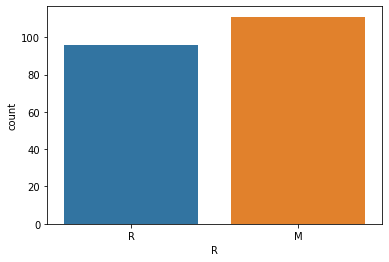

In [15]:
sns.countplot('R',data=data)

In [16]:
data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,...,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,...,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,...,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,...,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,...,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050,0.832150,0.852250,0.873350,0.874550,...,0.553950,0.510200,0.438750,0.430550,0.424700,0.389150,0.385100,0.325050,0.267650,0.229750,0.200650,0.154750,0.119700,0.068950,0.025100,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,0.734200,0.706000,0.713100,0.997000,1.000000,0.998800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.949700,1.000000,0.985700,0.929700,0.899500,0.824600,0.773300,0.776200,0.703400,0.729200,0.55

In [17]:
data.groupby('R').mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,...,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,0.174857,0.191936,0.226275,0.271093,0.310153,0.377156,0.418216,0.449785,0.466334,0.500443,0.541895,0.569937,0.614835,0.654790,0.668785,...,0.456648,0.414706,0.346151,0.311828,0.318511,0.287870,0.252015,0.211085,0.172523,0.141044,0.116724,0.094347,0.068812,0.038451,0.017644,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


In [18]:
#splitting data into training and test sets

In [19]:
y=data.R
X=data.drop(columns='R',axis=1)

In [20]:
X

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,...,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,...,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,...,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,...,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,...,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,...,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,...,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,...,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,...,0.0364,0.1572,0.1823,0.1349,0.0849,0.0492,0.1367,0.1552,0.1548,0.1319,0.0985,0.1258,0.0954,0.0489,0.0241,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

In [22]:
#splitting model into train and test

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [105]:
X_train

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
163,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,0.3691,0.3750,0.3927,0.3308,0.1085,0.1139,0.3446,0.5441,0.6470,0.7276,0.7894,0.8264,0.8697,0.7836,0.7140,...,0.3905,0.1249,0.3629,0.6356,0.8116,0.7664,0.5417,0.2614,0.1723,0.2814,0.2764,0.1985,0.1502,0.1219,0.0493,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
149,0.0209,0.0278,0.0115,0.0445,0.0427,0.0766,0.1458,0.1430,0.1894,0.1853,0.1748,0.1556,0.1476,0.1378,0.2584,0.3827,0.4784,0.5360,0.6192,0.7912,0.9264,1.0000,0.9080,0.7435,0.5557,...,0.2489,0.3837,0.3514,0.2654,0.1760,0.1599,0.0866,0.0590,0.0813,0.0492,0.0417,0.0495,0.0367,0.0115,0.0118,0.0133,0.0096,0.0014,0.0049,0.0039,0.0029,0.0078,0.0047,0.0021,0.0011
180,0.0423,0.0321,0.0709,0.0108,0.1070,0.0973,0.0961,0.1323,0.2462,0.2696,0.3412,0.4292,0.3682,0.3940,0.2965,0.3172,0.2825,0.3050,0.2408,0.5420,0.6802,0.6320,0.5824,0.6805,0.5984,...,0.1799,0.3039,0.4760,0.5756,0.4254,0.5046,0.7179,0.6163,0.5663,0.5749,0.3593,0.2526,0.2299,0.1271,0.0356,0.0367,0.0176,0.0035,0.0093,0.0121,0.0075,0.0056,0.0021,0.0043,0.0017
197,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,0.2652,0.3100,0.2381,0.1918,0.1430,0.1735,0.1781,0.2852,0.5036,0.6166,0.7616,0.8125,0.7793,0.8788,0.8813,...,0.0271,0.0580,0.1262,0.1072,0.1082,0.0360,0.1197,0.2061,0.2054,0.1878,0.2047,0.1716,0.1069,0.0477,0.0170,0.0186,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060
30,0.0084,0.0153,0.0291,0.0432,0.0951,0.0752,0.0414,0.0259,0.0692,0.1753,0.1970,0.1167,0.1683,0.0814,0.2179,0.5121,0.7231,0.7776,0.6222,0.3501,0.3733,0.2622,0.3776,0.7361,0.8673,...,0.3195,0.1388,0.1048,0.1681,0.1910,0.1174,0.0933,0.0856,0.0951,0.0986,0.0956,0.0426,0.0407,0.0106,0.0179,0.0056,0.0236,0.0114,0.0136,0.0117,0.0060,0.0058,0.0031,0.0072,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.0216,0.0215,0.0273,0.0139,0.0357,0.0785,0.0906,0.0908,0.1151,0.0973,0.1203,0.1102,0.1192,0.1762,0.2390,0.2138,0.1929,0.1765,0.0746,0.1265,0.2005,0.1571,0.2605,0.5386,0.8440,...,0.2344,0.1058,0.0383,0.0528,0.1291,0.2241,0.1915,0.1587,0.0942,0.0840,0.0670,0.0342,0.0469,0.0357,0.0136,0.0082,0.0140,0.0044,0.0052,0.0073,0.0021,0.0047,0.0024,0.0009,0.0017
39,0.0068,0.0232,0.0513,0.0444,0.0249,0.0637,0.0422,0.1130,0.1911,0.2475,0.1606,0.0922,0.2398,0.3220,0.4295,0.2652,0.0666,0.1442,0.2373,0.2595,0.2493,0.3903,0.6384,0.8037,0.7026,...,0.4546,0.2959,0.1587,0.1681,0.0842,0.1173,0.1754,0.2728,0.1705,0.0194,0.0213,0.0354,0.0420,0.0093,0.0204,0.0199,0.0173,0.0163,0.0055,0.0045,0.0068,0.0041,0.0052,0.0194,0.0105
175,0.0635,0.0709,0.0453,0.0333,0.0185,0.1260,0.1015,0.1918,0.3362,0.3900,0.4674,0.5632,0.5506,0.4343,0.3052,0.3492,0.3975,0.3875,0.5280,0.7198,0.7702,0.8562,0.8688,0.9236,1.0000,...,0.3724,0.4649,0.3488,0.1817,0.1142,0.1220,0.2621,0.4461,0.4726,0.3263,0.1423,0.0390,0.0406,0.0311,0.0086,0.0154,0.0048,0.0025,0.0087,0.0072,0.0095,0.0086,0.0085,0.0040,0.0051
51,0.0087,0.0046,0.0081,0.0230,0.0586,0.0682,0.0993,0.0717,0.0576,0.0818,0.1315,0.1862,0.2789,0.2579,0.2240,0.2568,0.2933,0.2991,0.3924,0.4691,0.5665,0.6464,0.6774,0.7577,0.8856,...,0.2157,0.2216,0.2776,0.2309,0.1444,0.1513,0.1745,0.1756,0.1424,0.0908,0.0138,0.0469,0.0480,0.0159,0.0045,0.0015,0.0052,0.0038,0.0079,0.0114,0.0050,0.0030,0.0064,0.0058,0.0030


In [106]:
X_test

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,...,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
112,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,0.1995,0.2869,0.3275,0.3769,0.4169,0.5036,0.6180,0.8025,0.9333,0.9399,0.9275,0.9450,0.8328,0.7773,0.7007,...,0.2401,0.3619,0.3314,0.3763,0.4767,0.4059,0.3661,0.2320,0.1450,0.1017,0.1111,0.0655,0.0271,0.0244,0.0179,0.0109,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079
147,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,0.2891,0.3985,0.4576,0.5821,0.5027,0.1930,0.2579,0.3177,0.2745,0.6186,0.8958,0.7442,0.5188,0.2811,0.1773,...,0.0998,0.1781,0.1586,0.3001,0.2208,0.1455,0.2895,0.3203,0.1414,0.0629,0.0734,0.0805,0.0608,0.0565,0.0286,0.0154,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068
77,0.0231,0.0351,0.0030,0.0304,0.0339,0.0860,0.1738,0.1351,0.1063,0.0347,0.0575,0.1382,0.2274,0.4038,0.5223,0.6847,0.7521,0.7760,0.7708,0.8627,1.0000,0.8873,0.8057,0.8760,0.9066,...,0.0352,0.1073,0.1373,0.1331,0.1454,0.1115,0.0440,0.0762,0.1381,0.0831,0.0654,0.0844,0.0595,0.0497,0.0313,0.0154,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030
27,0.0100,0.0275,0.0190,0.0371,0.0416,0.0201,0.0314,0.0651,0.1896,0.2668,0.3376,0.3282,0.2432,0.1268,0.1278,0.4441,0.6795,0.7051,0.7966,0.9401,0.9857,0.8193,0.5789,0.6394,0.7043,...,0.5077,0.5534,0.3352,0.2723,0.2278,0.2044,0.1986,0.0835,0.0908,0.1380,0.1948,0.1211,0.0843,0.0589,0.0247,0.0118,0.0088,0.0104,0.0036,0.0088,0.0047,0.0117,0.0020,0.0091,0.0058
189,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,0.2476,0.2783,0.2896,0.2956,0.3189,0.1892,0.1730,0.2226,0.2427,0.3149,0.4102,0.3808,0.4896,0.6292,0.7519,...,0.1245,0.1592,0.1626,0.2356,0.2483,0.2437,0.2715,0.1184,0.1157,0.1449,0.1883,0.1954,0.1492,0.0511,0.0155,0.0189,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024
67,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,0.1522,0.1322,0.1434,0.1244,0.0653,0.0890,0.1226,0.1846,0.3880,0.3658,0.2297,0.2610,0.4193,0.5848,0.5643,...,0.4593,0.4679,0.1987,0.0699,0.1493,0.1713,0.1654,0.2600,0.3846,0.3754,0.2414,0.1077,0.0224,0.0155,0.0187,0.0125,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012
64,0.0176,0.0172,0.0501,0.0285,0.0262,0.0351,0.0362,0.0535,0.0258,0.0474,0.0526,0.1854,0.1040,0.0948,0.0912,0.1688,0.1568,0.0375,0.1316,0.2086,0.1976,0.0946,0.1965,0.1242,0.0616,...,0.9705,0.7766,0.6313,0.5760,0.6148,0.5450,0.4813,0.3406,0.1916,0.1134,0.0640,0.0911,0.0980,0.0563,0.0187,0.0088,0.0042,0.0175,0.0171,0.0079,0.0050,0.0112,0.0179,0.0294,0.0063
196,0.0366,0.0421,0.0504,0.0250,0.0596,0.0252,0.0958,0.0991,0.1419,0.1847,0.2222,0.2648,0.2508,0.2291,0.1555,0.1863,0.2387,0.3345,0.5233,0.6684,0.7766,0.7928,0.7940,0.9129,0.9498,...,0.0561,0.0948,0.1700,0.1215,0.1282,0.0386,0.1329,0.2331,0.2468,0.1960,0.1985,0.1570,0.0921,0.0549,0.0194,0.0166,0.0132,0.0027,0.0022,0.0059,0.0016,0.0025,0.0017,0.0027,0.0027
160,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,0.2192,0.2621,0.2419,0.2179,0.1159,0.1237,0.0886,0.1755,0.1758,0.1540,0.0512,0.1805,0.4039,0.5697,0.6577,...,0.6848,0.7337,0.6281,0.5725,0.6119,0.5597,0.4965,0.5027,0.5772,0.5907,0.4803,0.3877,0.2779,0.1427,0.0424,0.0271,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021
185,0.0209,0.0191,0.0411,0.0321,0.0698,0.1579,0.1438,0.1402,0.3048,0.3914,0.3504,0.3669,0.3943,0.3311,0.3331,0.3002,0.2324,0.1381,0.3450,0.4428,0.4890,0.3677,0.4379,0.4864,0.6207,...,0.1147,0.1433,0.1820,0.3605,0.5529,0.5988,0.5077,0.5512,0.5027,0.7034,0.5904,0.4069,0.2761,0.1584,0.0510,0.0054,0.0078,0.0201,0.0104,0.0039,0.0031,0.0062,0.0087,0.0070,0.0042


In [107]:
y_train

163    M
149    M
180    M
197    M
30     R
      ..
68     R
39     R
175    M
51     R
146    M
Name: R, Length: 165, dtype: object

In [108]:
y_test

112    M
147    M
77     R
27     R
189    M
67     R
64     R
196    M
160    M
185    M
136    M
43     R
145    M
82     R
169    M
66     R
184    M
11     R
174    M
96     M
48     R
33     R
75     R
62     R
22     R
158    M
125    M
111    M
168    M
104    M
105    M
129    M
95     R
150    M
73     R
37     R
107    M
132    M
38     R
21     R
124    M
89     R
Name: R, dtype: object

In [109]:
#building the model
#LOGISTIC REGRESSION

In [110]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [111]:
y1_predict=model.predict(X_test)
z1_predict=model.predict(X_train)

In [112]:
y1_predict

array(['M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R',
       'M', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R',
       'M', 'M', 'R'], dtype=object)

In [113]:
z1_predict

array(['M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R',
       'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M',
       'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'R',
       'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M'], dtype=object)

              precision    recall  f1-score   support

           M       0.75      0.65      0.70        23
           R       0.64      0.74      0.68        19

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.70      0.69      0.69        42



<AxesSubplot:>

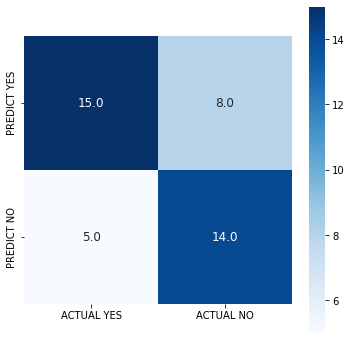

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y1_predict))
cf=pd.DataFrame(confusion_matrix(y_test,y1_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf,cbar=True,square=True,annot=True,fmt='0.1f',annot_kws={'size':12},cmap='Blues')

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_predict)

0.6904761904761905

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z1_predict)

0.8484848484848485

In [119]:
#buliding model 2

# Decision tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
y2_predict=dtree.predict(X_test)
z2_predict=dtree.predict(X_train)

In [122]:
y2_predict

array(['R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R',
       'M', 'R', 'R'], dtype=object)

In [123]:
z2_predict

array(['M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'M',
       'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M',
       'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M'], dtype=object)

              precision    recall  f1-score   support

           M       0.81      0.74      0.77        23
           R       0.71      0.79      0.75        19

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



<AxesSubplot:>

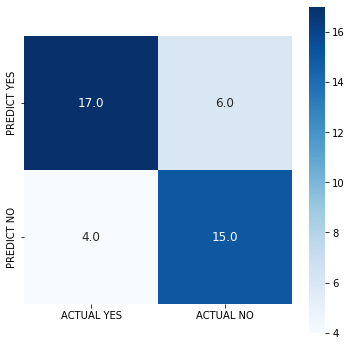

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y2_predict))
cf2=pd.DataFrame(confusion_matrix(y_test,y2_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf2,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y2_predict)

0.7619047619047619

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z2_predict)

1.0

# Random Forest classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [129]:
y3_predict=rfc.predict(X_test)
z3_predict=rfc.predict(X_train)

In [130]:
y3_predict

array(['M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'R',
       'M', 'M', 'R'], dtype=object)

In [131]:
z3_predict

array(['M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'M',
       'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M',
       'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M'], dtype=object)

              precision    recall  f1-score   support

           M       0.83      0.87      0.85        23
           R       0.83      0.79      0.81        19

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



<AxesSubplot:>

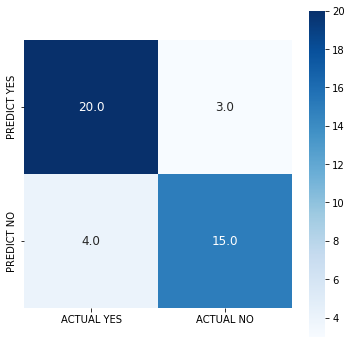

In [132]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y3_predict))
cf3=pd.DataFrame(confusion_matrix(y_test,y3_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf3,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.1f',cmap='Blues')

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y3_predict)

0.8333333333333334

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z3_predict)

1.0

In [166]:
#building model method 4


# support vecctor machine classifer


In [137]:
from sklearn import svm
svmc=svm.SVC(kernel='linear')
svmc.fit(X_train,y_train)

SVC(kernel='linear')

In [138]:
y4_predict=svmc.predict(X_test)
z4_predict=svmc.predict(X_train)

In [139]:
y4_predict

array(['M', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R',
       'M', 'M', 'R'], dtype=object)

In [140]:
z4_predict

array(['M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M',
       'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R',
       'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M',
       'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M',
       'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M'], dtype=object)

              precision    recall  f1-score   support

           M       0.77      0.87      0.82        23
           R       0.81      0.68      0.74        19

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.78        42



<AxesSubplot:>

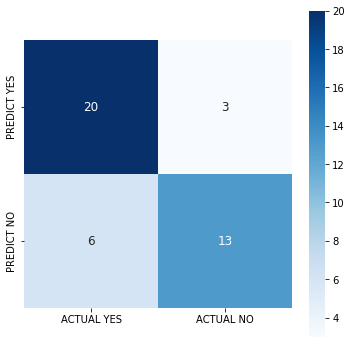

In [141]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y4_predict))
cf4=pd.DataFrame(confusion_matrix(y_test,y4_predict),columns=['ACTUAL YES','ACTUAL NO'],index=['PREDICT YES','PREDICT NO'])
plt.figure(figsize=(6,6))
sns.heatmap(cf4,cbar=True,square=True,annot=True,annot_kws={'size':12},cmap='Blues')

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y4_predict)

0.7857142857142857

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,z4_predict)

0.8606060606060606

In [88]:
#building a table between accuracy score(X_train vs X_test)

In [159]:

table={'model':['LogisticRegression','DesicionTreeClassifier','support vector machine classifier','RandomForest Classifier'],
      'accuracy(X_train)':[0.848,1.0,0.868,1.0],
      'accuracy(X_test)':[0.696,0.690,0.785,0.857]
      }

In [90]:
pd.DataFrame(table)

,model,accuracy(X_train),accuracy(X_test)
0,LogisticRegression,0.848,0.696
1,DesicionTreeClassifier,1.000,0.690
2,support vector machine classifier,0.868,0.785
3,RandomForest Classifier,1.000,0.857


In [160]:
#building a prediction sysytem

In [161]:
#sice svmc model has accuracy close for training and testing dataset so we are using svmc model for prediction

In [162]:
#the data points are first row of the data set
input_data=(0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044)
#changing the input data into array
input_data_np_array=np.asarray(input_data)
#reshaping the input data(to take one entity)
data_reshaped=input_data_np_array.reshape(1,-1)
print(data_reshaped)

prediction=svmc.predict(data_reshaped)
print(prediction)

#case statement
if (prediction[0]=='R'):
    print('there is a rock')
else:
    print('there is a mine')

[[0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872
  0.4918 0.6552 0.6919 0.7797 0.7464 0.9444 1.     0.8874 0.8024 0.7818
  0.5212 0.4052 0.3957 0.3914 0.325  0.32   0.3271 0.2767 0.4423 0.2028
  0.3788 0.2947 0.1984 0.2341 0.1306 0.4182 0.3835 0.1057 0.184  0.197
  0.1674 0.0583 0.1401 0.1628 0.0621 0.0203 0.053  0.0742 0.0409 0.0061
  0.0125 0.0084 0.0089 0.0048 0.0094 0.0191 0.014  0.0049 0.0052 0.0044]]
['M']
there is a mine


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [163]:
#now cheching with y_test

In [165]:
print(y_test.values[0])#taking only values of dependent feature

M


In [ ]:
#so both are predict same